# Decision Trees

Using dataset about [heart failure](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?resource=download)

## Dataset characterics
918 Observations and 11 attributes

* Age
* Sex
* ChestPainType
* RestingBP
* Cholesterol
* FastingBS
* RestECG
* MaxHR
* ExerciseAngina
* Oldpeak
* ST_Slope

# Import packages

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import math

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Import dataset

In [17]:
df = pd.read_csv('heart.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [18]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [19]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


<Axes: xlabel='HeartDisease', ylabel='count'>

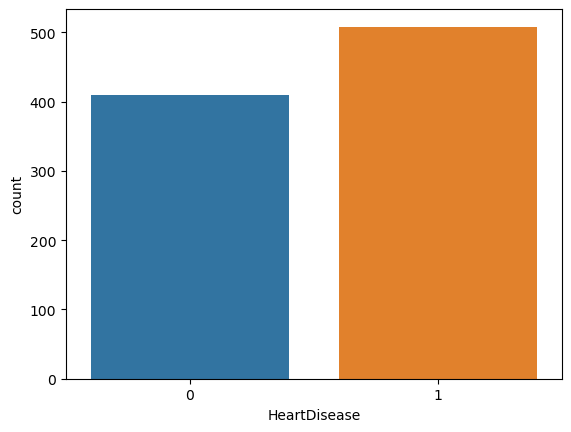

In [20]:
sns.countplot(x='HeartDisease',data=df)

# Pre-processing data (Using one-hot encoding for some discrete fearure)
using pd.get_dummies()

In [21]:
y = df['HeartDisease'].values
Xdf = df.drop(columns = ['HeartDisease'])
discrete_features = ['Sex', 'ChestPainType', 'RestingECG',
                     'ExerciseAngina', 'ST_Slope']
Xdf = pd.get_dummies(data = Xdf, prefix = discrete_features,
                    columns = discrete_features)
Xdf.head()
X = Xdf.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)
X_test, X_cv, y_test, y_cv = train_test_split(X_test, y_test, test_size = 0.5, random_state=42)
print(X_train.shape) ; print(y_train.shape)
print(X_cv.shape) ; print(y_cv.shape)
print(X_test.shape) ; print(y_test.shape)

(550, 20)
(550,)
(184, 20)
(184,)
(184, 20)
(184,)


# Calculate Accuracy

In [22]:
def getAccuracy(yhat, y):
    sampleSize = y.shape[0]
    correct = 0
    for i in range(sampleSize):
        if (y[i] == yhat[i]):
            correct += 1
    return correct / sampleSize

# Decision Tree
* [API](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

## min_sample_split
The minimum number of samples required to split an internal node. Test what is the best option.
* If int, then consider min_samples_split as the minimum number.
* If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

200


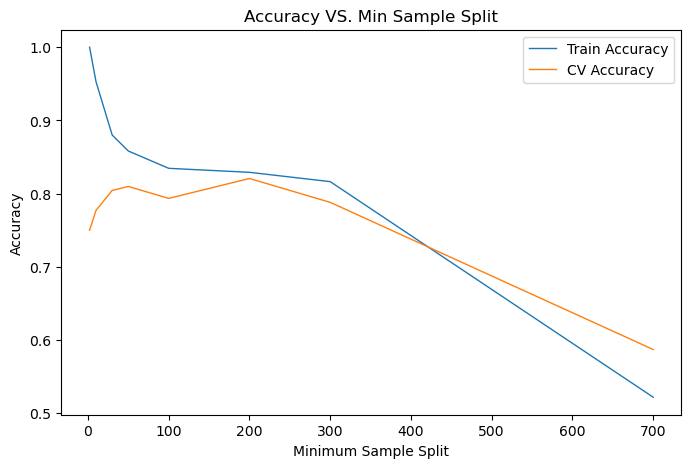

In [23]:
possible_values = [2, 10, 30, 50, 100, 200, 300, 700]
RS = 42

trainAccuracy_list = []
cvAccuracy_list = []

for value in possible_values:
    model = DecisionTreeClassifier(min_samples_split = value, random_state = RS)
    model.fit(X_train, y_train)
    yhat_train = model.predict(X_train)
    yhat_cv = model.predict(X_cv)
    trainAccuracy = getAccuracy(yhat_train, y_train)
    cvAccuracy = getAccuracy(yhat_cv, y_cv)
    trainAccuracy_list.append(trainAccuracy)
    cvAccuracy_list.append(cvAccuracy)

plt.plot(possible_values, trainAccuracy_list, linewidth = 1, label = "Train Accuracy")
plt.plot(possible_values, cvAccuracy_list, linewidth = 1, label = "CV Accuracy")
plt.legend()
plt.xlabel("Minimum Sample Split")
plt.ylabel("Accuracy")
plt.gcf().set_size_inches(8, 5)
plt.title("Accuracy VS. Min Sample Split")
temp = cvAccuracy_list.index(max(cvAccuracy_list))
best_min_sample_split = possible_values[temp]
print(best_min_sample_split)

## Maximum Depth

3


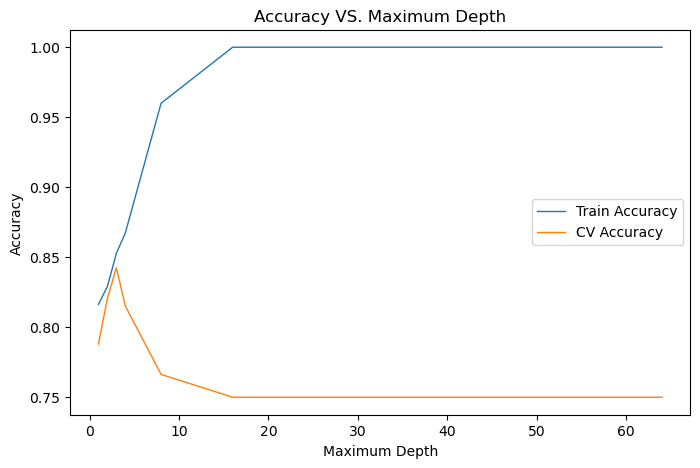

In [24]:
possible_values = [1,2, 3, 4, 8, 16, 32, 64, None]
RS = 42

trainAccuracy_list = []
cvAccuracy_list = []

for value in possible_values:
    model = DecisionTreeClassifier(max_depth = value, random_state = RS)
    model.fit(X_train, y_train)
    yhat_train = model.predict(X_train)
    yhat_cv = model.predict(X_cv)
    trainAccuracy = getAccuracy(yhat_train, y_train)
    cvAccuracy = getAccuracy(yhat_cv, y_cv)
    trainAccuracy_list.append(trainAccuracy)
    cvAccuracy_list.append(cvAccuracy)

plt.plot(possible_values, trainAccuracy_list, linewidth = 1, label = "Train Accuracy")
plt.plot(possible_values, cvAccuracy_list, linewidth = 1, label = "CV Accuracy")
plt.legend()
plt.xlabel("Maximum Depth")
plt.ylabel("Accuracy")
plt.gcf().set_size_inches(8, 5)
plt.title("Accuracy VS. Maximum Depth")
temp = cvAccuracy_list.index(max(cvAccuracy_list))
best_max_depth = possible_values[temp]
print(best_max_depth)

In [25]:
model = DecisionTreeClassifier(min_samples_split = best_min_sample_split,
                               max_depth = best_max_depth,
                               random_state = RS)
model.fit(X_train, y_train)
yhat = model.predict(X_test)
print(f"Testing set Accuracy: {getAccuracy(yhat, y_test)}")

Testing set Accuracy: 0.8097826086956522


# Random Forest
* [API](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)


In [26]:
min_samples_split_values = [2,10, 30, 50, 100, 200, 300, 700]
max_depth_values = [2, 4, 8, 16, 32, 64, None]
n_estimators_values = [10,50,100,500]
combinations = []

for min_samples_split in min_samples_split_values:
    for max_depth in max_depth_values:
        for n_estimators in n_estimators_values:
            combinations.append([min_samples_split, max_depth, n_estimators])

num_of_combinations = len(combinations)
train_accuracies = [] ; cv_accuracies = []

for idx , combination in enumerate(combinations):
    #print(idx)
    model = RandomForestClassifier(min_samples_split = combination[0],
                                 max_depth = combination[1],
                                 n_estimators = combination[2],
                                 max_features = 'sqrt',
                                 n_jobs = -1,
                                 random_state = RS)
    model.fit(X_train, y_train)
    yhat_train = model.predict(X_train) ; yhat_cv = model.predict(X_cv)
    train_accuracy = getAccuracy(yhat_train, y_train)
    cv_accuracy = getAccuracy(yhat_cv, y_cv)
    train_accuracies.append(train_accuracy) ; cv_accuracies.append(cv_accuracy)

temp = cv_accuracies.index(max(cv_accuracies))
best_combination = combinations[temp]
print(best_combination)

# using the best combination
model = RandomForestClassifier(min_samples_split = best_combination[0],
                                 max_depth = best_combination[1],
                                 n_estimators = best_combination[2],
                                 max_features = 'sqrt',
                                 n_jobs = -1,
                                 random_state = RS)
model.fit(X_train, y_train)
yhat_test = model.predict(X_test)
test_accuracy = getAccuracy(yhat_test, y_test)
print(f"Testing set Accuracy: {test_accuracy}")

[30, 8, 10]
Testing set Accuracy: 0.8641304347826086


# XGBoost
* [API](https://xgboost.readthedocs.io/en/stable/)

In [27]:
xgboost = XGBClassifier(n_estimators = 500, learning_rate = 0.1,verbosity = 1, random_state = RS)
xgboost.fit(X_train,y_train, eval_set = [(X_cv, y_cv)], early_stopping_rounds = 10)
xgboost.best_iteration
yhat_test = xgboost.predict(X_test)
test_accuracy = getAccuracy(yhat_test, y_test)
print(f"Testing set Accuracy: {test_accuracy}")

[0]	validation_0-logloss:0.64084
[1]	validation_0-logloss:0.60075
[2]	validation_0-logloss:0.56770
[3]	validation_0-logloss:0.54082
[4]	validation_0-logloss:0.51907
[5]	validation_0-logloss:0.49612
[6]	validation_0-logloss:0.48195
[7]	validation_0-logloss:0.46360
[8]	validation_0-logloss:0.44724
[9]	validation_0-logloss:0.43485
[10]	validation_0-logloss:0.42295
[11]	validation_0-logloss:0.41144
[12]	validation_0-logloss:0.40357
[13]	validation_0-logloss:0.39288
[14]	validation_0-logloss:0.38716
[15]	validation_0-logloss:0.38075
[16]	validation_0-logloss:0.37179
[17]	validation_0-logloss:0.36335
[18]	validation_0-logloss:0.35859
[19]	validation_0-logloss:0.35458
[20]	validation_0-logloss:0.34934
[21]	validation_0-logloss:0.34472
[22]	validation_0-logloss:0.34280
[23]	validation_0-logloss:0.33979
[24]	validation_0-logloss:0.33531
[25]	validation_0-logloss:0.33427
[26]	validation_0-logloss:0.33153
[27]	validation_0-logloss:0.32883
[28]	validation_0-logloss:0.32618
[29]	validation_0-loglos

/Users/tingyushi/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


# Code Decision Tree from scrach
Only works with discrete features.  
Modify the above features so that only discrete features are left

## Pre-processing dataset

In [28]:
# drop continous features from the above data set
df = pd.read_csv('heart.csv')
df = df.drop(columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease'])
df.head()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,0,Normal,N,Up
1,F,NAP,0,Normal,N,Flat
2,M,ATA,0,ST,N,Up
3,F,ASY,0,Normal,Y,Flat
4,M,NAP,0,Normal,N,Up


In [29]:
discrete_features = ['Sex', 'ChestPainType', 'RestingECG',
                     'ExerciseAngina', 'ST_Slope']
Xdf = pd.get_dummies(data = df, prefix = discrete_features,
                    columns = discrete_features)
Xdf.head()

,FastingBS,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [30]:
X = Xdf.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)
X_test, X_cv, y_test, y_cv = train_test_split(X_test, y_test, test_size = 0.5, random_state=42)
print(X_train.shape) ; print(y_train.shape)
print(X_cv.shape) ; print(y_cv.shape)
print(X_test.shape) ; print(y_test.shape)

(550, 15)
(550,)
(184, 15)
(184,)
(184, 15)
(184,)


## Using API with the new dataset(with only discrete features)

In [31]:
model = DecisionTreeClassifier(min_samples_split = best_min_sample_split,
                               max_depth = best_max_depth,
                               random_state = RS)
model.fit(X_train, y_train)
yhat = model.predict(X_test)
print(f"Testing set Accuracy: {getAccuracy(yhat, y_test)}")

Testing set Accuracy: 0.8315217391304348


## Code from the scrach

best max depth: 6
Accuracy on testing set: 0.842391304347826


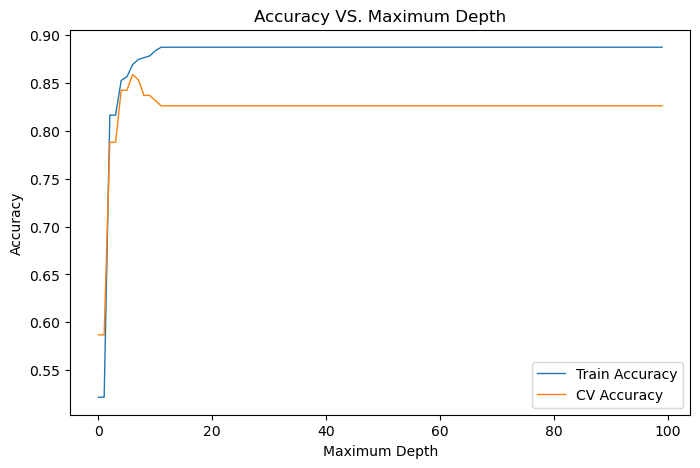

In [32]:
def entropy(p):
    '''
    Used to calculate impurity

    Args:
    p : the fraction of positive examples

    Returns:
    entropy
    '''
    if p == 0 or p == 1:
        return 0
    return -1 * p * np.log2(p) - (1 - p) * np.log2(1 - p)



def split_dataset(X, node_indices, feature):
    '''
    split a dataset according to a discrete featurefeature

    Args:
    X            : entire data set
    node_indices : the indices of node that are being considered
    feature      : the index of a feature

    Returns:
    node indices of left branch and right branch
    '''
    left_indices = [] ; right_indices = []
    for node_index in node_indices:
        if (X[node_index , feature] == 1):
            left_indices.append(node_index)
        else:
            right_indices.append(node_index)
    return left_indices, right_indices



def information_gain(X, y, node_indices, feature):
    '''
    Calculate information gain if we splite on a specific feature

    Args:
    X       : training examples
    y       : labels
    feature : an index indicating a specific feature

    Returns:
    the information gain of a set of nodes spliting on a specific feature
    '''

    left_indices, right_indices = split_dataset(X, node_indices, feature)

    # this feature is not useful, set informaion gain to be -inf
    if len(left_indices) == 0 or len(right_indices) == 0:
        return -math.inf

    X_root = X[node_indices] ; y_root = y[node_indices]
    X_left = X[left_indices] ; y_left = y[left_indices]
    X_right = X[right_indices] ; y_right = y[right_indices]

    wleft = X_left.shape[0] / X_root.shape[0]
    wright = X_right.shape[0] / X_root.shape[0]

    proot = np.count_nonzero(y_root) / y_root.shape[0]
    pleft = np.count_nonzero(y_left) / y_left.shape[0]
    pright = np.count_nonzero(y_right) / y_right.shape[0]

    return entropy(proot) - (wleft * entropy(pleft) + wright * entropy(pright))



def select_feature(X, y, node_indices):
    '''
    select a feature for a node

    Args:
    X            : the whole data set
    y            : labels
    node_indices : the node indices that are being considered

    Returns:
    the index of the selected feature, if we cannot gain any information by
    using any feature, return -1
    '''
    feature_size = X.shape[1]
    best_feature_index = 0
    best_info_gain = information_gain(X, y, node_indices, best_feature_index)
    for feature in range(feature_size):
        temp = information_gain(X, y, node_indices, feature)
        if temp > best_info_gain:
            best_info_gain = temp
            best_feature_index = feature

    if best_info_gain < 0:
        return -1
    return best_feature_index



class Node:
    '''
    The node class for the decision tree
    '''
    def __init__(self):
        self.feature = -1
        self.left = None
        self.right = None
        self.is_leaf = False
        self.classNumber = -1
        self.node_indices = None

    def getClass(self):
        if self.is_leaf:
            return self.classNumber
        else:
            return None



def build_empty_tree(max_depth):
    '''
    Build a complete Binary Tree with max depth

    Args:
    max_depth : maximum depth of the decision tree

    Returns:
    root of the empty tree
    '''
    root = Node()
    for i in range(max_depth):
        if i == 0:
            previous_layer = [root]
        temp = []
        for node in previous_layer:
            node.left = Node()
            node.right = Node()
            temp.append(node.left)
            temp.append(node.right)
        previous_layer = temp


    return root



def build_tree(X, y, node_indices, max_depth):
    '''
    Build the decision tree

    Args:
    X             : dataset
    y             : labels
    node_indices  : the indices of nodes that are considered when building the tree
    max_depth     : maximum depth of the decision tree

    Returns:
    the root of the tree
    '''

    # build root node
    root = Node()
    root.feature = select_feature(X, y, node_indices)
    root.node_indices = node_indices

    previous_layer = [root]

    for i in range(max_depth - 1):
        temp = []

        for node in previous_layer:

            # creating left node and right node
            node.left = Node()
            node.right = Node()

            #split data first
            left_indices, right_indices = split_dataset(X, node.node_indices,
                                                      node.feature)

            # assign node indices to left node and right node
            node.left.node_indices = left_indices
            node.right.node_indices = right_indices

            # select feature for the left node
            left_feature = select_feature(X, y, left_indices)
            if left_feature < 0:
                node.left.is_leaf = True
                ylables = y[left_indices]
                class1Size = np.count_nonzero(ylables)
                if (class1Size / len(left_indices) ) > 0.5:
                    node.left.classNumber = 1
                else:
                    node.left.classNumber = 0
            else:
                node.left.feature = left_feature
                temp.append(node.left)

            # select feature for the right node
            right_feature = select_feature(X, y, right_indices)
            if right_feature < 0:
                node.right.is_leaf = True
                ylabels = y[right_indices]
                class1Size = np.count_nonzero(ylabels)
                if (class1Size / len(right_indices)) > 0.5:
                    node.right.classNumber = 1
                else:
                    node.right.classNumber = 0
            else:
                node.right.feature = right_feature
                temp.append(node.right)

        previous_layer = temp

    # handle the last layer
    for leaf_node in previous_layer:
        leaf_node.is_leaf = True
        ylables = y[leaf_node.node_indices]
        class1Size = np.count_nonzero(ylables)
        if (class1Size / len(leaf_node.node_indices) ) > 0.5:
            leaf_node.classNumber = 1
        else:
            leaf_node.classNumber = 0

    return root



def predict1(x, root):
    '''
    predict a single data example

    Args:
    x    : a data example
    root : the root of the decision tree

    Retures:
    predicted label
    '''
    current = root
    while not current.is_leaf:
        if x[current.feature] == 1:
            current = current.left
        else:
            current = current.right
    return current.getClass()



def predict(X, root):
    '''
    predict a set of data examples

    Args:
    X    : data set
    root : root of the decision tree

    Returns:
    predictions
    '''
    m = X.shape[0]
    yhat = []
    for i in range(m):
        x = X[i , :]
        yhat.append(predict1(x, root))
    return yhat


nodes = [i for i in range(y_train.shape[0])]
depths =[i for i in range(100)]
train_accuracies = []
cv_accuracies = []

for depth in depths:
    root = build_tree(X_train, y_train, nodes, depth)
    yhat = predict(X_train, root)
    train_accuracies.append(getAccuracy(yhat, y_train))
    yhat = predict(X_cv, root)
    cv_accuracies.append(getAccuracy(yhat, y_cv))

plt.plot(depths, train_accuracies, linewidth = 1, label = "Train Accuracy")
plt.plot(depths, cv_accuracies, linewidth = 1, label = "CV Accuracy")
plt.legend()
plt.xlabel("Maximum Depth")
plt.ylabel("Accuracy")
plt.gcf().set_size_inches(8, 5)
plt.title("Accuracy VS. Maximum Depth")
temp = cv_accuracies.index(max(cv_accuracies))
best_max_depth = depths[temp]
print(f"best max depth: {best_max_depth}")

root = build_tree(X_train, y_train, nodes, best_max_depth)
yhat = predict(X_test, root)
print(f"Accuracy on testing set: {getAccuracy(yhat, y_test)}")

# Future Plan
* Handle continuous features